In [1]:
import torch
from models.CNN_2D import SignDataset
from models.CNN_2D import DataLoader
from models.CNN_2D import TemporalCNN
from models.CNN_2D import train_model

import torch.nn as nn

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

train_ds = SignDataset("../data/annotations/WLSL_100/train.csv")
val_ds   = SignDataset("../data/annotations/WLSL_100/val.csv")

train_loader = DataLoader(train_ds, batch_size=8, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=8, shuffle=False)

num_classes = train_ds.df.class_id.nunique()

model = TemporalCNN(num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

history = train_model(
    model,
    train_loader,
    val_loader,
    optimizer,
    criterion,
    device,
    epochs=25
)


Using device: cuda
Epoch [1/25] | Train Loss: 4.6131, Train Acc: 0.0067 | Val Loss: 4.6060, Val Acc: 0.0061
Epoch [2/25] | Train Loss: 4.6047, Train Acc: 0.0120 | Val Loss: 4.6043, Val Acc: 0.0061
Epoch [3/25] | Train Loss: 4.6026, Train Acc: 0.0053 | Val Loss: 4.6030, Val Acc: 0.0121
Epoch [4/25] | Train Loss: 4.6004, Train Acc: 0.0120 | Val Loss: 4.6019, Val Acc: 0.0182
Epoch [5/25] | Train Loss: 4.5952, Train Acc: 0.0147 | Val Loss: 4.6026, Val Acc: 0.0182
Epoch [6/25] | Train Loss: 4.5860, Train Acc: 0.0120 | Val Loss: 4.6061, Val Acc: 0.0061
Epoch [7/25] | Train Loss: 4.5855, Train Acc: 0.0134 | Val Loss: 4.6123, Val Acc: 0.0182
Epoch [8/25] | Train Loss: 4.5837, Train Acc: 0.0134 | Val Loss: 4.6123, Val Acc: 0.0182
Epoch [9/25] | Train Loss: 4.5722, Train Acc: 0.0107 | Val Loss: 4.5995, Val Acc: 0.0242
Epoch [10/25] | Train Loss: 4.5614, Train Acc: 0.0160 | Val Loss: 4.6092, Val Acc: 0.0182
Epoch [11/25] | Train Loss: 4.5475, Train Acc: 0.0120 | Val Loss: 4.6027, Val Acc: 0.0242


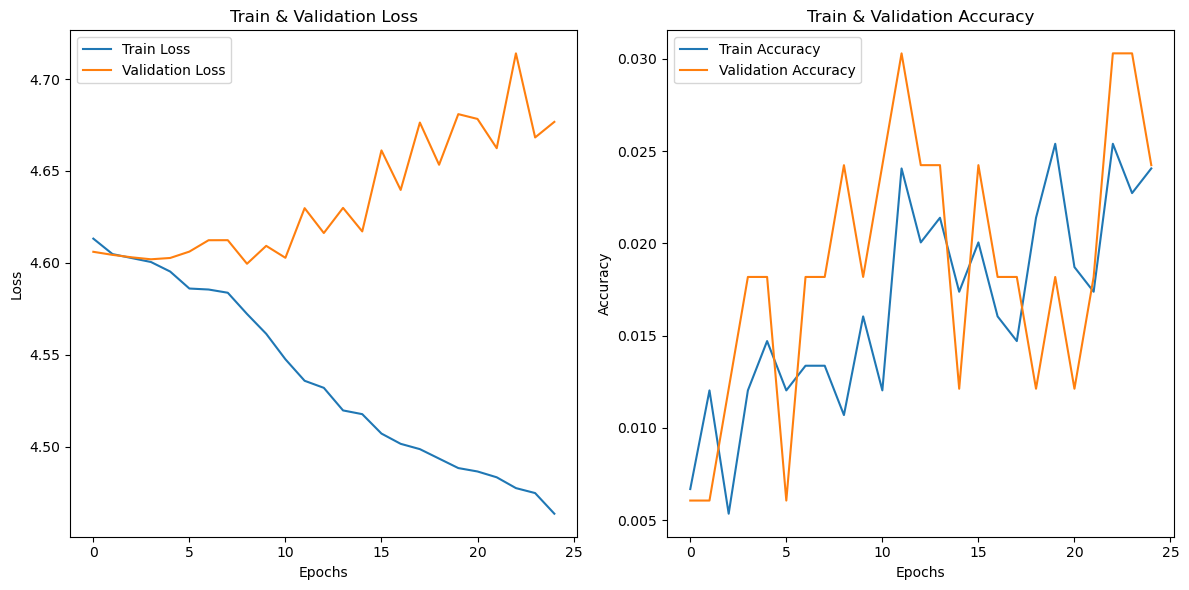

In [2]:
import matplotlib.pyplot as plt


# Plotting the training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history["train_loss"], label="Train Loss")
plt.plot(history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train & Validation Loss")
plt.legend()

# Plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history["train_acc"], label="Train Accuracy")
plt.plot(history["val_acc"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Train & Validation Accuracy")
plt.legend()

# Show both plots
plt.tight_layout()
plt.show()


In [3]:
save_path = "models/trained_modelstemporal_cnn.pkl"
torch.save(model.state_dict(), save_path)
print(f"Model saved to {save_path}")


Model saved to models/trained_modelstemporal_cnn.pkl
